In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from datetime import datetime


#import geopandas as gpd
#import geoplot as gplt
#import mapclassify
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import re
import seaborn as sns
#!pip3 install seaborn
from plotly.offline import plot
from plotly.graph_objs import *

# DATAFRAME 4

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
df4 = pd.read_csv('Dataset4.- Comercio Exterior de Espa§a.txt', delimiter='|')
df4.dtypes

PERIOD        object
REPORTER      object
PARTNER       object
PRODUCT       object
FLOW          object
INDICATORS    object
Value         object
dtype: object

In [3]:
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 360976 rows and 7 columns


In [4]:
df4.sample(5)

,PERIOD,REPORTER,PARTNER,PRODUCT,FLOW,INDICATORS,Value
42599,Jun. 2019,Croatia,ES,Fresh or chilled cabbage lettuce(2000-2500),EXPORT,QUANTITY_IN_100KG,:
248290,Sep. 2019,Malta,ES,"Fresh nectarines(1998-2500)|Nectarines, fresh(...",EXPORT,VALUE_IN_EUROS,:
214685,Apr. 2020,Latvia,ES,Fresh or dried grapefruit(2000-2500)|Fresh or ...,IMPORT,QUANTITY_IN_100KG,726
164050,Apr. 2018,Greece,ES,"Fresh pawpaws ""papayas""(1988-2500)",EXPORT,VALUE_IN_EUROS,:
108305,Sep. 2020,"European Union - 27 countries (AT, BE, BG, CY,...",ES,Fresh or chilled edible mushrooms (excl. chant...,IMPORT,QUANTITY_IN_100KG,3605


In [5]:
def function(valor):
    if len(valor)!= 9:
        return valor[5:]
    else:
        return valor

df4['Aux'] = df4['PERIOD'].map(function)

In [6]:
df4.sample(5)

,PERIOD,REPORTER,PARTNER,PRODUCT,FLOW,INDICATORS,Value,Aux
94655,Apr. 2020,Estonia,ES,Fresh or chilled cauliflowers and headed brocc...,EXPORT,QUANTITY_IN_100KG,:,Apr. 2020
193220,Sep. 2020,Ireland (Eire),ES,"Tomatoes, fresh or chilled(1998-2500)",IMPORT,VALUE_IN_EUROS,434882,Sep. 2020
280406,Dec. 2018,Poland,ES,Fresh pears (excl. perry pears in bulk from 1 ...,EXPORT,VALUE_IN_EUROS,:,Dec. 2018
298755,May. 2018,Romania,ES,Fresh cherries (excl. sour cherries)(2012-2500),EXPORT,QUANTITY_IN_100KG,:,May. 2018
356012,Jul. 2019,Sweden,ES,"Fresh or dried citrus fruit (excl. oranges, le...",IMPORT,VALUE_IN_EUROS,15196,Jul. 2019


In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360976 entries, 0 to 360975
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PERIOD      360976 non-null  object
 1   REPORTER    360976 non-null  object
 2   PARTNER     360976 non-null  object
 3   PRODUCT     360976 non-null  object
 4   FLOW        360976 non-null  object
 5   INDICATORS  360976 non-null  object
 6   Value       360976 non-null  object
 7   Aux         360976 non-null  object
dtypes: object(8)
memory usage: 22.0+ MB


In [8]:
def function(valor):
    if valor == ':' :
        return 0
    else:
        valor=valor.replace(" ", "")
        return float(valor)

df4['Value'] = df4['Value'].map(function)
df4.sample(5)

,PERIOD,REPORTER,PARTNER,PRODUCT,FLOW,INDICATORS,Value,Aux
199111,Jan. 2020,Italy (incl. San Marino 'SM' -> 1993),ES,Fresh or chilled gherkins(1988-2500),EXPORT,QUANTITY_IN_100KG,0.0,Jan. 2020
21994,Apr. 2019,Belgium (incl. Luxembourg 'LU' -> 1998),ES,Fresh or dried pineapples(1988-2500),EXPORT,VALUE_IN_EUROS,106962.0,Apr. 2019
212752,Apr. 2020,Latvia,ES,Fresh or chilled new potatoes from 1 January t...,IMPORT,VALUE_IN_EUROS,0.0,Apr. 2020
350812,Apr. 2019,Sweden,ES,Fresh grapes (excl. table grapes)(2000-2500),IMPORT,VALUE_IN_EUROS,0.0,Apr. 2019
95421,Nov. 2020,Estonia,ES,Fresh or chilled edible mushrooms (excl. chant...,IMPORT,QUANTITY_IN_100KG,0.0,Nov. 2020


### Intento de analisis de aquellas filas que presentan valores anuales:

In [9]:
anuales=df4[df4["PERIOD"].apply(lambda x: len(x)!=9)]
anuales.sample(5)
nRow, nCol = anuales.shape
print(f'There are {nRow} rows and {nCol} columns')
anuales

There are 19712 rows and 8 columns


,PERIOD,REPORTER,PARTNER,PRODUCT,FLOW,INDICATORS,Value,Aux
48,Jan.-Dec. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",IMPORT,VALUE_IN_EUROS,1058.0,Dec. 2018
49,Jan.-Dec. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",IMPORT,QUANTITY_IN_100KG,4.0,Dec. 2018
50,Jan.-Dec. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",EXPORT,VALUE_IN_EUROS,0.0,Dec. 2018
51,Jan.-Dec. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",EXPORT,QUANTITY_IN_100KG,0.0,Dec. 2018
100,Jan.-Dec. 2019,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",IMPORT,VALUE_IN_EUROS,0.0,Dec. 2019
...,...,...,...,...,...,...,...,...
360879,Jan.-Dec. 2018,Sweden,ES,"White and red cabbages, fresh or chilled(1988-...",EXPORT,QUANTITY_IN_100KG,0.0,Dec. 2018
360928,Jan.-Dec. 2019,Sweden,ES,"White and red cabbages, fresh or chilled(1988-...",IMPORT,VALUE_IN_EUROS,483.0,Dec. 2019
360929,Jan.-Dec. 2019,Sweden,ES,"White and red cabbages, fresh or chilled(1988-...",IMPORT,QUANTITY_IN_100KG,4.0,Dec. 2019
360930,Jan.-Dec. 2019,Sweden,ES,"White and red cabbages, fresh or chilled(1988-...",EXPORT,VALUE_IN_EUROS,31.0,Dec. 2019


In [10]:
agrupa = anuales.groupby(['PERIOD'])

                REPORTER  PARTNER  PRODUCT  FLOW  INDICATORS  Value   Aux
PERIOD                                                                   
Jan.-Dec. 2018      9744     9744     9744  9744        9744   9744  9744
Jan.-Dec. 2019      9744     9744     9744  9744        9744   9744  9744
Jan.-Dec. 2020       224      224      224   224         224    224   224


<AxesSubplot:xlabel='PERIOD'>

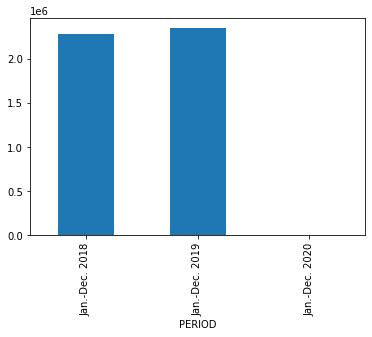

In [11]:
print(agrupa.count())
anuales.groupby('PERIOD').mean()["Value"].plot(kind='bar')

In [12]:
# Por qué pasa eso?

periodo2020 = df4.loc[df4['PERIOD'] == "Jan.-Dec. 2020"]
periodo2020['Value'].unique() 

array([0.])

Mustra las filas del dataset en las que falte algún valor

In [13]:
#df.isnull().sample(10)
df4.loc[df4.isnull().any(axis='columns')]
df4.isnull().sum()

PERIOD        0
REPORTER      0
PARTNER       0
PRODUCT       0
FLOW          0
INDICATORS    0
Value         0
Aux           0
dtype: int64

Sacar las fechas en formato datetime:

In [14]:
months= {'Jan.': '1' , 'Feb.': '2' , 'Mar.': '3', 'Apr.': '4', 'May.': '5', 'Jun.': '6', 'Jul.': '7', 'Aug.': '8', 'Sep.': '9', 'Oct.': '10' , 'Nov.':'11', 'Dec.':'12'}
def stringPeriodToDate(valor):
    if valor[0:4] not in months.keys():
        pass
    else: 
        valor= months[valor[0:4]]+'/'+valor[5:]
        return datetime.strptime(valor, '%m/%Y')
        
df4['Date'] = df4['Aux'].map(stringPeriodToDate) 
df4.head(5)

,PERIOD,REPORTER,PARTNER,PRODUCT,FLOW,INDICATORS,Value,Aux,Date
0,Jan. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",IMPORT,VALUE_IN_EUROS,0.0,Jan. 2018,2018-01-01
1,Jan. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",IMPORT,QUANTITY_IN_100KG,0.0,Jan. 2018,2018-01-01
2,Jan. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",EXPORT,VALUE_IN_EUROS,0.0,Jan. 2018,2018-01-01
3,Jan. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",EXPORT,QUANTITY_IN_100KG,0.0,Jan. 2018,2018-01-01
4,Feb. 2018,Austria,ES,"Bananas, fresh (excl. plantains)(2012-2500)",IMPORT,VALUE_IN_EUROS,0.0,Feb. 2018,2018-02-01


Agrupa filas por columna 'FLOW' para ver que tenemos casos balanceados de importaciones y exportaciones:

In [15]:
df4.groupby('FLOW').count()

,PERIOD,REPORTER,PARTNER,PRODUCT,INDICATORS,Value,Aux,Date
FLOW,,,,,,,,
EXPORT,180488,180488,180488,180488,180488,180488,180488,180488
IMPORT,180488,180488,180488,180488,180488,180488,180488,180488


Cuantos partners hay?

In [16]:
df4['PARTNER'].describe()

count     360976
unique         1
top           ES
freq      360976
Name: PARTNER, dtype: object

Cuantos reporters hay?

In [17]:
df4['REPORTER'].describe()

count        360976
unique           28
top       Lithuania
freq          12892
Name: REPORTER, dtype: object

# Vamos a quitar los faltantes a lo loco

In [18]:
df4Completo=df4.dropna(axis='rows', how='any', inplace=False) # Borra las filas que tengan al menos un valor faltante

(Si se no se especifica la opción `inplace=True`, en lugar de borrar los datos del dataframe original, se devuelve un nuevo dataframe sin las filas/columnas con datos faltantes)

In [19]:
df4Completo.sample(10)

,PERIOD,REPORTER,PARTNER,PRODUCT,FLOW,INDICATORS,Value,Aux,Date
209426,Dec. 2018,Latvia,ES,Fresh navel oranges(2017-2500),EXPORT,VALUE_IN_EUROS,0.0,Dec. 2018,2018-12-01
146454,Jan. 2019,Germany (incl. German Democratic Republic 'DD'...,ES,Fresh or chilled chanterelles(2002-2500),EXPORT,VALUE_IN_EUROS,0.0,Jan. 2019,2019-01-01
48360,Feb. 2019,Croatia,ES,Fresh pears (excl. perry pears in bulk from 1 ...,IMPORT,VALUE_IN_EUROS,0.0,Feb. 2019,2019-02-01
167029,Jul. 2018,Greece,ES,"Shallots, fresh or chilled(1988-2500)",IMPORT,QUANTITY_IN_100KG,0.0,Jul. 2018,2018-07-01
258933,Feb. 2019,Netherlands,ES,Dried pawpaws(1988-2500),IMPORT,QUANTITY_IN_100KG,0.0,Feb. 2019,2019-02-01
225024,Oct. 2019,Lithuania,ES,Fresh or chilled globe artichokes(2012-2500),IMPORT,VALUE_IN_EUROS,0.0,Oct. 2019,2019-10-01
138522,May. 2020,France (incl. Saint Barthélemy 'BL' -> 2012| i...,ES,Fresh peaches (excl. nectarines)(1998-2500)|Pe...,EXPORT,VALUE_IN_EUROS,241018.0,May. 2020,2020-05-01
132283,Jan. 2020,France (incl. Saint Barthélemy 'BL' -> 2012| i...,ES,"Fresh nectarines(1998-2500)|Nectarines, fresh(...",EXPORT,QUANTITY_IN_100KG,0.0,Jan. 2020,2020-01-01
286131,Sep. 2020,Portugal,ES,Fresh durians(2002-2500),EXPORT,QUANTITY_IN_100KG,0.0,Sep. 2020,2020-09-01
114871,Sep. 2018,"European Union - 27 countries (AT, BE, BG, CY,...",ES,"Onions, fresh or chilled (excl. sets)(1988-2500)",EXPORT,QUANTITY_IN_100KG,32381.0,Sep. 2018,2018-09-01


In [20]:
df4['PRODUCT'].describe()

count                                                360976
unique                                                   87
top       Fresh or chilled new potatoes from 1 January t...
freq                                                   4368
Name: PRODUCT, dtype: object

# DATAFRAME 3

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
df3 = pd.read_csv('Dataset3b_Datos_MercaBarna.txt', delimiter='|', encoding ='utf-8', decimal=',')
df3.dtypes
df3.sample(10)

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen
10502,ESCAROLA,BARCELONA,kg,HORTALIZAS HOJA,2020,10,0.750000,43557
797,AJOS SECOS,ALICANTE,kg,HORTALIZAS BULBOS,2018,1,1.775000,3270
20719,JUDÃA BOBI,SEGOVIA,kg,HORTALIZAS VAINA,2018,9,2.300000,2600
22483,LECHUGA SIN DETERMINAR,ALICANTE,kg,HORTALIZAS HOJA,2018,2,0.600000,36972
22519,LECHUGA SIN DETERMINAR,ALMERIA,kg,HORTALIZAS HOJA,2018,3,0.600000,204224
5203,CALÃOTS,BARCELONA,kg,HORTALIZAS BULBOS,2020,5,0.076667,7125
14935,FRUTAS GROSELLA,ITALIA,kg,FRUTAS OTRAS,2019,9,11.000000,676
3317,BERENJENA LARGA,VALLADOLID,kg,HORTALIZAS FRUTO,2020,9,1.200000,8769
39467,VARIOS,ALMERIA,kg,OTROS OTROS,2019,10,1.500000,67159
10195,ENDÃBIAS,BELGICA,kg,HORTALIZAS TALLOS,2018,12,0.850000,15005


In [4]:
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 41862 rows and 8 columns


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41862 entries, 0 to 41861
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     41862 non-null  object 
 1   origen      41862 non-null  object 
 2   Unidad      41862 non-null  object 
 3   familia     41862 non-null  object 
 4   YEAR        41862 non-null  int64  
 5   MONTH       41862 non-null  int64  
 6   price_mean  41862 non-null  float64
 7   Volumen     41862 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.6+ MB


In [9]:
df3['origen'].unique()
internacionales= ['FRANCIA','ITALIA', 'ALEMANIA','CHILE', 'CHINA', 'ECUADOR', 'MARRUECOS', 'OTROS AMERICA', 'USA',  
                  'BRASIL', 'CANADA', 'COLOMBIA', 'COSTA MARFIL', 'GRAN BRETAÑA', 'HOLANDA', 'KENIA', 'MEJICO', 
                  'OCEANIA', 'OTROS AFRICA', 'PORTUGAL', 'SUDAFRICA', 'SUIZA', 'ARGENTINA',
                  'LUXEMBURGO', 'TURQUIA', 'BELGICA', 'COSTA RICA', 'DINAMARCA', 'TUNEZ', 'ISRAEL',
                  'TAILANDIA', 'NUEVA ZELANDA', 'OTROS ASIA', 'ANDORRA', 'GRECIA','IRLANDA', 
                  'URUGUAY', 'OTROS EUROPA',
                 'AUSTRIA', 'CUBA', 'SUECIA', 'CAMERUN', 'ISLANDIA','COREA']
def intern(x):
    for i in internacionales :
        if x == i:
            return 'si'
    return 'no'

df3['Internacionales'] = df3['origen'].map(intern) 
df3.sample(15)

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen,Internacionales
34501,PIMIENTO VERDE ITALIANO,GRANADA,kg,HORTALIZAS FRUTO,2020,6,0.963158,66173,no
36618,SECO ALMENDRAS,GERONA,kg,FRUTAS FRUTO,2018,11,3.800000,2,no
1028,AJOS SECOS,GERONA,kg,HORTALIZAS BULBOS,2019,5,1.880952,24125,no
29682,NÃSCALOS,HUESCA,kg,OTROS SETAS,2019,11,6.875000,1190,no
8771,COLES,CATELLON,kg,HORTALIZAS HOJA,2018,12,0.670588,46990,no
33951,PIMIENTO ROJO,FRANCIA,kg,HORTALIZAS FRUTO,2018,5,1.050000,8,si
7303,CHAMPIÃONES,ALBACETE,kg,OTROS SETAS,2020,3,1.650000,85312,no
18207,FRUTAS SANDÃA CON GRANA,BRASIL,kg,FRUTAS OTRAS,2020,8,0.487500,651565,si
10987,ESPINACAS,SEVILLA,kg,HORTALIZAS HOJA,2020,2,0.700000,3810,no
32654,PERA DE VERANO,HUESCA,kg,FRUTAS SEMILLA,2019,8,1.300000,82548,no


In [10]:
groupIntern = df3.groupby(['Internacionales'])
groupIntern['price_mean'].mean()

Internacionales
no    1.711941
si    1.834479
Name: price_mean, dtype: float64

In [11]:
groupIntern['Volumen'].mean()

Internacionales
no     74793.865432
si    101582.466316
Name: Volumen, dtype: float64

<AxesSubplot:xlabel='Internacionales'>

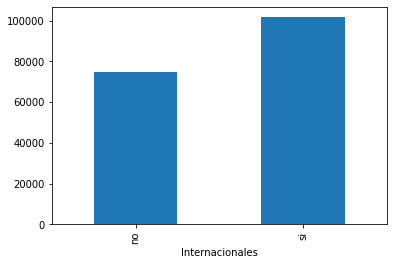

In [12]:
groupIntern.mean()["Volumen"].plot(kind='bar')

<AxesSubplot:xlabel='Internacionales'>

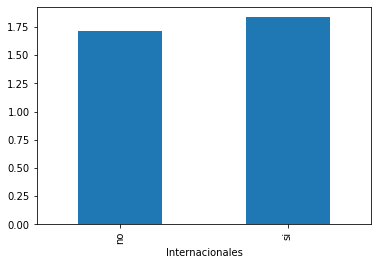

In [13]:
groupIntern.mean()["price_mean"].plot(kind='bar')

# ----------------------------------------------------------------------------------------

In [29]:
df3['Fecha'] = (df3['MONTH'].astype(str) + "/" + df3['YEAR'].astype(str))
df3

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen,Internacionales,Fecha
0,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,4,3.8000,12,no,4/2018
1,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,5,3.8000,5,no,5/2018
2,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,6,3.8000,10,no,6/2018
3,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,7,3.8000,4,no,7/2018
4,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,8,3.8000,12,no,8/2018
...,...,...,...,...,...,...,...,...,...,...
41857,ZANAHORIA,VALLADOLID,kg,HORTALIZAS RAÃZ,2020,11,0.4625,444376,no,11/2020
41858,ZANAHORIA,ZARAGOZA,kg,HORTALIZAS RAÃZ,2019,8,0.5050,374,no,8/2019
41859,ZANAHORIA,ZARAGOZA,kg,HORTALIZAS RAÃZ,2019,9,0.5500,122,no,9/2019
41860,ZANAHORIA,ZARAGOZA,kg,HORTALIZAS RAÃZ,2019,10,0.5500,127,no,10/2019


In [30]:
df3= df3.sort_values(by = "Fecha")
df3.head(2)

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen,Internacionales,Fecha
24140,MANDARINA CLEMENTINA,MURCIA,kg,FRUTAS CÃTRICOS,2018,1,0.702381,901810,no,1/2018
7066,CEREZAS,CHILE,kg,FRUTAS HUESO,2018,1,10.615385,6338,no,1/2018


In [31]:
df3['Fecha'] = df3['Fecha'].map(lambda x : datetime.strptime(x, '%m/%Y'))

In [32]:
df3.head(2)

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen,Internacionales,Fecha
24140,MANDARINA CLEMENTINA,MURCIA,kg,FRUTAS CÃTRICOS,2018,1,0.702381,901810,no,2018-01-01
7066,CEREZAS,CHILE,kg,FRUTAS HUESO,2018,1,10.615385,6338,no,2018-01-01


In [33]:
g2018= df3.loc[df3['Fecha'] <  "2019-01-01"]
g2019= df3[(df3['Fecha'] > '2018-12-01') & (df3['Fecha'] < '2020-01-01')]
g2020= df3.loc[df3['Fecha'] >  "2019-12-01"]

In [34]:
g2020.sample(2)

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen,Internacionales,Fecha
19192,FRUTAS UVA BLANCA,ZARAGOZA,kg,FRUTAS OTRAS,2020,10,1.6,6480,no,2020-10-01
24284,MANDARINA CLEMENTINA,VALENCIA,kg,FRUTAS CÃTRICOS,2020,9,1.8,400371,no,2020-09-01


<AxesSubplot:title={'center':'2020'}, xlabel='Fecha'>

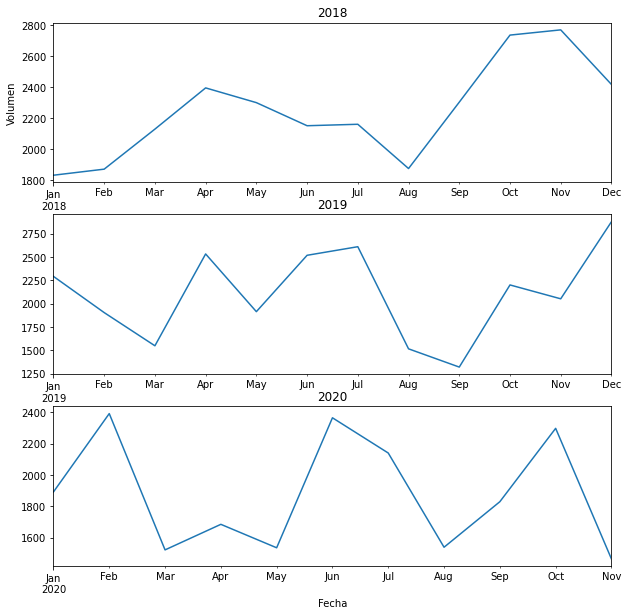

In [35]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.subplot(3, 1, 1) # Gráfica 1 de un total de 2x2 gráficas
plt.title('2018')
plt.ylabel('Volumen')
g2018.groupby(['Fecha'])['price_mean'].mean().plot()

plt.subplot(3, 1, 2) # Gráfica 2 de un total de 2x2 gráficas
plt.title('2019')
g2019.groupby(['Fecha'])['price_mean'].sum().plot()

plt.subplot(3, 1, 3) # Gráfica 3 de un total de 2x2 gráficas
plt.title('2020')
g2020.groupby(['Fecha'])['price_mean'].sum().plot()


# DATAFRAME 5

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
df5 = pd.read_csv('Dataset5_Coronavirus_cases.txt', delimiter='|', encoding ='utf-8', decimal=',')
df5.dtypes
df5.sample(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
17634,04/03/2020,4,3,2020,1,0,Estonia,EE,EST,1.324820e+06,Europe,0.150964
2354,02/07/2020,2,7,2020,593,6,Armenia,AM,ARM,2.957728e+06,Europe,269.125491
58038,29/08/2020,29,8,2020,9,1,Yemen,YE,YEM,2.916192e+07,Asia,0.291476
11674,12/05/2020,12,5,2020,1,0,China,CN,CHN,1.433784e+09,Asia,0.005091
53807,11/10/2020,11,10,2020,3137,47,Tunisia,TN,TUN,1.169472e+07,Africa,137.506487
35444,16/10/2020,16,10,2020,652,16,Moldova,MD,MDA,4.043258e+06,Europe,272.354621
8905,01/05/2020,1,5,2020,4,0,Burkina_Faso,BF,BFA,2.032138e+07,Africa,0.501934
10304,27/05/2020,27,5,2020,0,1,Cape_Verde,CV,CPV,5.499360e+05,Africa,21.820721
11438,08/04/2020,8,4,2020,301,6,Chile,CL,CHL,1.895204e+07,America,22.129550
37704,04/06/2020,4,6,2020,0,0,Namibia,NaN,NAM,2.494524e+06,Africa,0.360790


In [37]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df5)
prof.to_file(output_file='report.html')

KeyboardInterrupt: 

In [ ]:
#!pip3 install pandas_profiling

In [126]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58690 entries, 0 to 58689
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     58690 non-null  object 
 1   day                                                         58690 non-null  int64  
 2   month                                                       58690 non-null  int64  
 3   year                                                        58690 non-null  int64  
 4   cases                                                       58690 non-null  int64  
 5   deaths                                                      58690 non-null  int64  
 6   countriesAndTerritories                                     58690 non-null  object 
 7   geoId                                                       58430 non-null  object 
 

In [133]:
df5['Fecha'] = (df5['day'].astype(str) + "/" + df5['month'].astype(str) + "/" + df5['year'].astype(str))
df5= df5.sort_values(by = "Fecha")
df5['Fecha'] = df5['Fecha'].map(lambda x : datetime.strptime(x, '%d/%m/%Y'))

Se quitan los outliers

In [163]:
df5 = df5.drop(df5[df5['cases'] < 0].index)
df5 = df5.drop(df5[df5['deaths'] < 0].index)

In [194]:
spain= df5.loc[df5['countriesAndTerritories'] == 'Spain']

<AxesSubplot:xlabel='cases'>

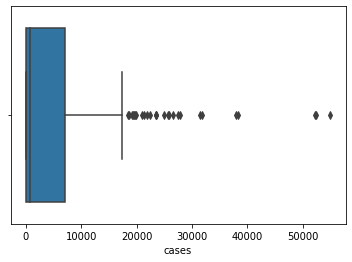

In [165]:
import seaborn as sns
sns.boxplot(x=spain.cases)

In [195]:
fig = px.bar(spain, x="Fecha", y="cases", title='Casos por covid')
fig.show()

In [196]:
fig = px.bar(spain, x="Fecha", y="deaths", title='Muertes por covid')
fig.add_trace()
fig.show()

TypeError: add_trace() missing 1 required positional argument: 'trace'

<AxesSubplot:xlabel='Fecha'>

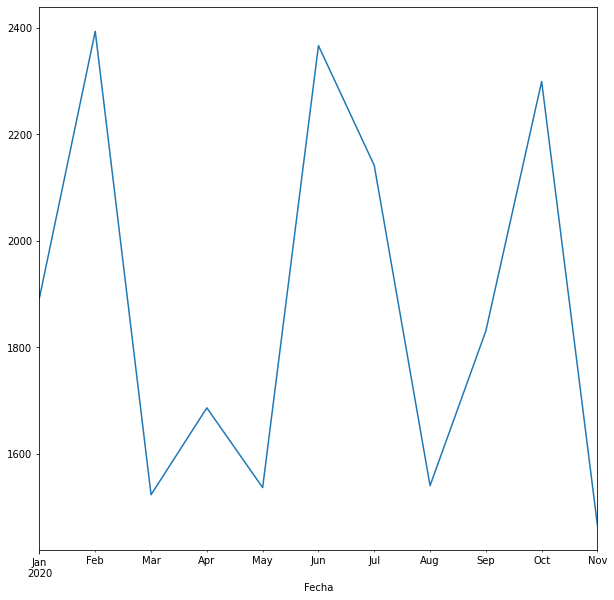

In [192]:
fig = plt.figure()
fig.set_size_inches(10,10)
g2020.groupby(['Fecha'])['price_mean'].sum().plot()
